<a href="https://colab.research.google.com/github/VinayaA2001/stock-market-prediction/blob/main/cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from  tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [22]:
import os
print(os.listdir('/content'))


['.config', 'archive (1).zip', 'sample_data', 'mnist_train_small.csv']


In [24]:
import zipfile
import os

zip_path = "/content/archive (1).zip"
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted folders:", os.listdir(extract_path))


Extracted folders: ['test_set', 'VINAYA_A (3).pdf', 'training_set']


In [25]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [26]:
train_dir = "/content/data/training_set"
test_dir = "/content/data/test_set"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.9758 - loss: 0.0185 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 1.0000 - loss: 1.2521e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 1.0000 - loss: 1.3428e-36 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 502s 2s/step - accuracy: 1.0000 - loss: 1.7489e-36 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 1.0000 - loss: 1.1846e-35 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [30]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


64/64 ━━━━━━━━━━━━━━━━━━━━ 33s 510ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Accuracy: 100.00%


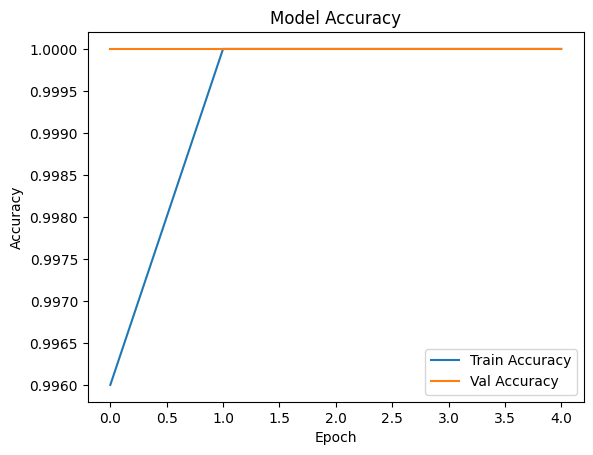

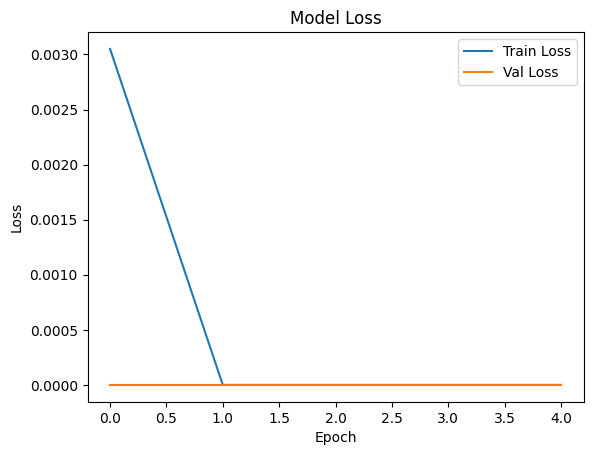

In [31]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/cat-2934720_960_720.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0] > 0.5:
    print("Prediction: Dog 🐶")
else:
    print("Prediction: Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Prediction: Cat 🐱


In [42]:
model.save('cat_dog_model.h5')


In [45]:
from google.colab import files
files.download('cat_dog_model.h5')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>